Subject: Advanced Machine Learning lab 10 - MDS

Author: Jamie Arjona

# LAB 10 a: Image classification with Convolutional Neural Networks

From previous laboratory session we have seen:

1. Working with Tensors.
2. What is autograd and the dynamic computational graph (used for backprop).
3. Any model can be implemented using the Pytorch framework.

Now we are going to focus on the thing that made Deep Learning (DL) famous: Convolutional Neural Networks (CNN).


## Introduction
It is easier to understand the concepts of a CNN if you have worked previously with Computer Vision (CV), as the framework is more or less similar.

CV problems are centered around the study and manipulation of images. Each image can be mathematically thinked as a 3-dimensional tensor (imagine them as a cube). The first dimension (channels) is related to the colors (1 channel if black & white images, 3 channels (RGB) in case of colored images) and the other two dimensions are the height and the weidth of the image. Each element of an image is a pixel and each pixel has a value between 0 and 255 (black to white).

In classical CV problems (30 years ago) different filters or kernels (2x2 or 3x3 patches, think of them as small squares) were applied to the images to detect features or to do some preprocessing. These filters were applied to the images by means of the use of the convolution operator. Some of the most popular kernels were:
* Filters for image enhancement:
  * Mean filter: The center pixel takes the average value of the neighbourhood.
  * Expansion filter: The center pixel takes the maximum value of the neighbourhood.
* Filters to extract features:
  * Sobel & Prewitt filters: Used to do edge extraction (measurement of the gradients in an image).

The following problems appeared when trying to model datasets composed by images using Machine Learning:
* Which filters I need in order to generate relevant features?
* Which algorithm I should use for classification?
* And lastly, like always: Computational problems with large images and the scarcity of the data.

### Introducing LeNet
In 1989, while working at Bell Labs, Yann Lecun proposed the idea of apply gradient descent to a 5 layers CNN for handrwitten digit recognition. This model, now known as LeNet, aimed to learn filters directly from images rather than manually designing them. LeNet achieved remarkable performance on the MNIST dataset (a collection of handwritten digits).

Although LeNet showed that CNN and backpropagation algorithms work well, they did not gain widespread attention due to the lack of computational power and the success of Support Vector Machines in 1995.

If you want to see LeNet in action on Mnist visit the following [link](http://yann.lecun.com/exdb/lenet/).

### Structure of a CNN model
In a CNN model different parts can be distinguished:
* Convolutional blocks.
* Fully connected layers.
* The output layer.

Every convolutional block is made or three elements:
* Convolutional layers: Extract spatial features from the image. There could be more than one convolutional layer after another.
* Non linear activation function: Like the tanh activation function, the sigmoid or the ReLu.
* Pooling Subsampling or pooling layers: Sampling by parts on the convoluted image in order to reduce computability and also gain some invariant properties.


After the last convolutional block, the first dimension (filter) is squashed in order to get a two dimensional tensor that will then be used as input of a block of fully connected (FC) layers (at least 2 layers).

Finally the output of the FC is used as input of the output layer.

Examples of LeNet and [AlexNet](https://en.wikipedia.org/wiki/AlexNet) architectures:

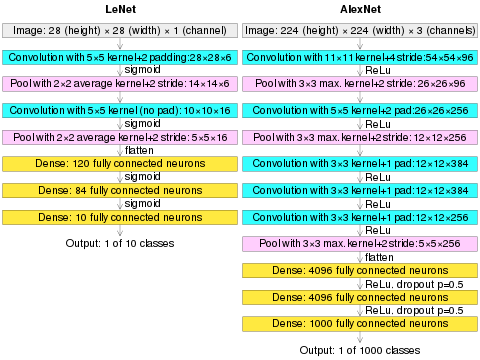

### The convolution operation
The [convolution](https://en.wikipedia.org/wiki/Convolution) is a mathematical operation with a lot of use in signal processing and engineering. One of its main appplications is to use filters on signals. Mathematically speaking, in the continuous domain we are applying a function over another function so we can put a threshold over certain values of the original function (for example cut the lower values).

In the discrete case (e.g. images), the operation of convolution is made by sliding a submatrix (filter or kernel, usually of size $3\times 3$ or $5 \times 5$) over the image, performing an operation over the pixels of the image. This operations is a linear combination in which all elements of the filter are multiplied and added over a patch (submatrix) of the original image producing as output a single value. Clearly this has the effect of reducing the original size of the image.

Convolutions are performed by sliding from top left to bottom right the filter over the image, after each convolution the filter is moved one position to the right and once the filter is at the last column of pixels, it is moved one position down and to the first column again. Check the following link to get an idea of [the action of sliding](https://gaussian37.github.io/assets/img/dl/concept/conv/3.gif).

Using filters with different values help in order to extract different features from the original image. After the filters are used, we get a new "image" that has been transformed by the convolution operation with hope that a model could classify it (think of this as new features).

While performing convolutions over image, some hyperparameters need to be decided by the designer of the model, those are:
* Pad: Those are numbers (typically with value 0) added to the margins of the image in order to being able to use convolution over the corners (the same number of times that the other pixels) and also control (preserve) the dimension of the output image.
* Stride: This is how many columns / rows we move the filter on each operation.

The following formula is very useful in order to asses the size of the image produced by convolution:
\begin{align}
        output\_width = \lfloor\frac{W-F_w+2P}{S_w}\rfloor+1
\end{align}

\begin{align}
        output\_height = \lfloor\frac{H-F_h+2P}{S_h}\rfloor+1
\end{align}

where $W$ and $H$ are width and height of original image, $F_w$ and $F_h$ are filter width and height, $P$ stands for number of padding and $S_w$ and $S_h$ stand for stride value



### Pooling
After a convolutional layer we have a *Pooling layer*. These layers are used in order to reduce spatial size of the images (computation) and provide the property of translation invariance to the model. It is used similar to convolution (an sliding operation over the image) but no filter is involved. It comes in two flavors:
* Average pooling: In a region of $P\times P$ we compute the average value of the pixels and that will be the output value.
* Max pooling: In a region of $P\times P$ we take the maximum value of the pixels and that will be the output value. This is the one most used.

On a pooling operation we can also define stride and padding, and so the output of the image will depend on those. This means that the same formula of the output size of the convolution works.



### Activation function
The common ones: sigmoid, tanh and ReLu. ReLu the one most used nowadays. The goal is to perform a non-linear transformation.

We get the same result if applying the activation function before pooling or after it but because pooling usually reduces the size, it is better to perform the activation function after pooling (but the difference is quite small).

### Concolution operation example


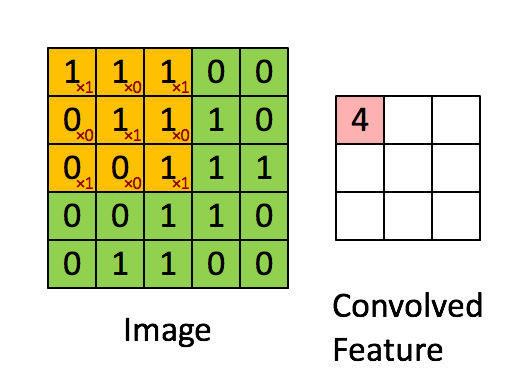
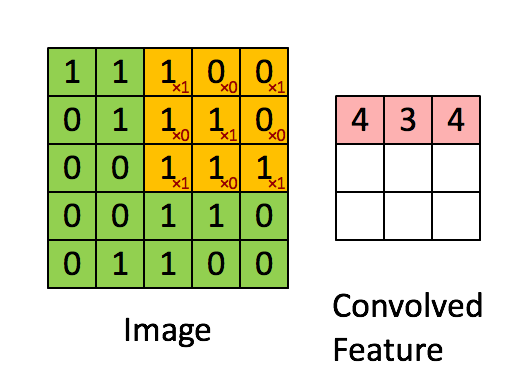

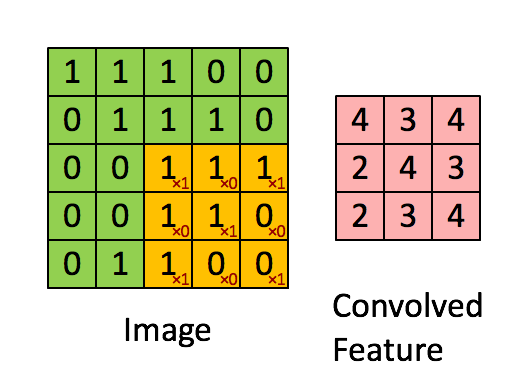

### Output layer
After the convolutional blocks and the fully connected layers it is usual to put a classification algorithm (the output layer). The output layer could be a logistic regression, i.e.: one neuron with a sigmoid activation function, (in binary classification) or a multinomial logistic regression, i.e: using as many neurons as classes followed by the softmax activation function, (multiple classes). Just take into account that it could be any classification model like a SVM or LDA.

The inuition is that by performing convolutions and other operations, the model has been able to learn useful features that are now able to be used by any learning method as input in order to solve the problem at hand.
It was usual to put 2 fully connected layers (multilayer perceptrons) to change the number of dimensions of the output of the convolutions (from a cube of 3 dimensions to a matrix) but there are proposals without the fully connected block.

Note: The technique of using the output of the last hidden layer as input to a classifier is known as Feature Extraction and is related to Transfer Learning techniques. Another common method in Transfer Learning is to take a CNN trained in a very large dataset and update its weights using a new smaller dataset.

**Questions**

1. *If we apply 16 filters to a black and white image, how many **dimensions** will have the image after convolution?*

2. *If we apply 16 filters to a black and white image, how many **channels** will have the image after convolution?*

3. *Compute the height and width of a 64x64 image after convolution with filter 5x5 and padding = 1, stride = 1.*

4. *Compute the height and width of a 32x32 image after convolution with filter 3x3 and padding = 1, stride = 2.*

5. *Which padding should you use if you want to mantain the image original size (32x32) after convolution using a filter 3x3 with stride = 1.*

6. *Output image after average pooling of size 2x2 on the following matrix (stride = 2).*
\begin{array}{cccc}
3&2&1&4 \\
1&2&5&4 \\
1&3&3&4 \\
5&2&6&4
\end{array}


7. *Output image after max pooling of size 2x2 on the previous matrix. (Stride = 1) on the previous exercise matrix*

8. *Output size of a 32x32 image after max pooling with stride = 1, padding = 0 and pooling of 3x3. on the previous exercise matrix*

### The softmax activation function
Imagine that we got a CNN model for classify images of numbers. Clearly the output of the model will be a vector of size 10. Each element of the vector represents one of the possible categories of our images, numbers from 0 to 9. We can think about the softmax function more or less like a vector version of the sigmoid function used for binary classification. It is important to note that the softmax function provides an output that acts as a probability distribution with all values in the range $[0,1]$. Also, in the way that it works, it pushes low values to 0 (usually positions that do not belong to the correct answer) and pushes to 1 the highest value of the input that usually corresponds to what the model predicts as the correct answer.

The formula:
\begin{align}
        \sigma(\textbf{z})_i = \frac{\textbf{e}^{z_{i}}}{\sum^K_{j=1}\textbf{e}^{z_j}}
\end{align}


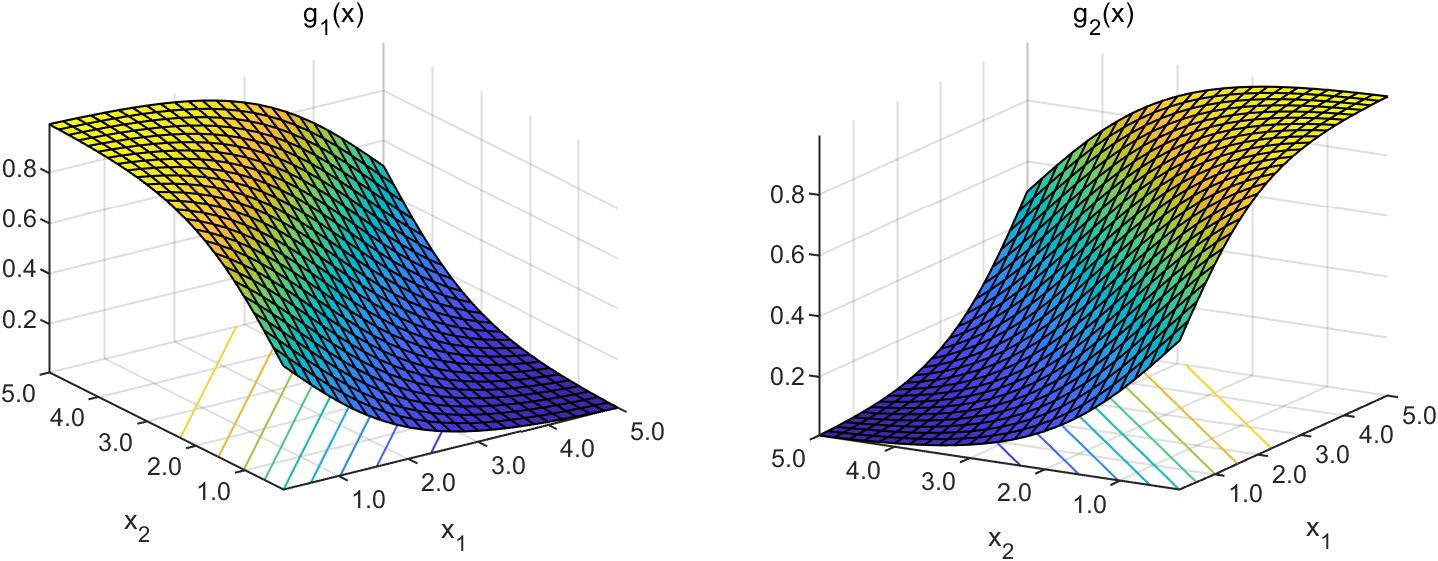

### The negative log-likelihood function (loss function)
The most common loss function to use with the softmax activation function is the *negative log-likelihood* function.

In statistics, one way of estimating the parameters of a probabilistic distribution function is through the method of the Maximum Likelihood Estimator where given the formula of the distribution and a bunch of observations (N needs to be a sufficiently large sample size), we estimate the values of the parameters that maximize the probability of each of the observations using the (log)likelihood formula. Observing that a multiclass problem is the same as a multinomial distribution, we can derive its likelihood function in order to be used in ML and DL.
In the case of Deep Learning, we use it in order to penalize the model in case of missclassifications, i.e: As a loss function. Doing so, we adjust the parameters in order to predict the correct class.

Note: Because we are minimizing the loss function through gradient descent, we need to put $-$ in the function. As maximizing a function is the same as minimizing the negative function.

The two classes function (binary classification) is:

\begin{align}
        \ell(w)=-\sum^N_{n=1}y_n\ln\sigma(\textbf{x}^T_n\textbf{w})+(1-y_n)\ln[1-\sigma(\textbf{x}^T_n\textbf{w})])
\end{align}
Because $\sigma(\textbf{x}^T_n\textbf{w})$ is the sofmax function, we can replace it with $\hat{y}_n$ as it is the output of the model, getting:
\begin{align}
        \ell(w)=-\sum^N_{n=1}y_n\ln\hat{y}_n+(1-y_n)\ln[1-\hat{y}_n])
\end{align}

This can be easily understood just putting number 0 or 1 to $y_n$ and $\hat{y_n}$ and checking what happens if they are equal and different.

In a multiclass setting the function becomes:
\begin{align}
        \ell(w)=-\sum^N_{n=1}y_n\ln(\hat{y_n})
\end{align}
We can simplify the function because all classes that are not the correct class have value of 0, this means that we only care in one element, the correct class and if our model does not provides a 1 in that class, then it counts towards the loss:
\begin{align}
        \ell(w)=-\ln(\hat{y_n})
\end{align}

Remember that the goal is to reduce the loss of the model through training, and so the only way to accomplish this is to put the biggest possible number to the correct class (and the maximum possible value is 1).


## Modeling with CNN
After this review of CV and CNN concepts, we can start this laboratory session.

Note: We are going to use the MNIST dataset (used in the previous laboratory).

### Advice: Select the GPU Hardware Acceleration in the Runtime environment Menu to train the network fast.

In [1]:
import numpy as np
np.random.seed(1)
import torch
import torch.optim as optim
torch.manual_seed(1)
if torch.cuda.is_available():
  torch.cuda.manual_seed_all(1)
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from timeit import default_timer as timer

### Defining the Hyper-parameters

We now define the hyperparameters that are going to be used throughout the notebook
to define the network, the data `batch_size`, the training `learning_rate`, and others. We are going to send the hparams to the GPU (cuda) device. Remember that whenever we send something to the selected device (X.to(device)) we already use either CPU or CUDA (GPU).

**Note**: The .to() operation is in-place for nn.Module's, so network.to(device) suffices. The .to() operation is **NOT** in.place for tensors, so we must assign the result to some tensor, like: X = X.to(device)


In [2]:
# Let's define some hyper-parameters
hparams = {
    'batch_size':64,
    'num_epochs':10,
    'test_batch_size':64,
    'hidden_size':128,
    'num_classes':10,
    'num_inputs':784,
    'learning_rate':1e-3,
    'log_interval':100,
}

# we select to work on GPU if it is available in the machine, otherwise
# will run on CPU
hparams['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
print(hparams['device'])

cuda


We can load the MNIST dataset using the `torchvision` package. This is very handly as it provides an already implemented DataLoader that uses an object of the class DataSet. In case of wanting to work with a dataset that is not in `torchvision`, it is recommended to create custom DataSet and DataLoader classes in order to be able to manage the data through the training pipeline easily. Check the [official tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) for more details on this.

In [3]:
mnist_trainset = datasets.MNIST('data', train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,), (0.3081,))
                                ]))
mnist_testset = datasets.MNIST('data', train=False,
                               transform=transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.1307,), (0.3081,))
                               ]))

train_loader = torch.utils.data.DataLoader(
    mnist_trainset,
    batch_size=hparams['batch_size'],
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    mnist_testset,
    batch_size=hparams['test_batch_size'],
    shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 97924048.61it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 26954983.05it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 32080245.46it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21073593.77it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
# We can retrieve a sample from the dataset by simply indexing it
img, label = mnist_trainset[0]
print('Img shape: ', img.shape)
print('Label: ', label)

# Similarly, we can sample a BATCH from the dataloader by running over its iterator
iter_ = iter(train_loader)
bimg, blabel = next(iter_)
print('Batch Img shape: ', bimg.shape)
print('Batch Label shape: ', blabel.shape)
print(f'The Batched tensors return a collection of {bimg.shape[0]} grayscale images ({bimg.shape[1]} channel, {bimg.shape[2]} height pixels, {bimg.shape[3]} width pixels)')
print(f'In the case of the labels, we obtain {blabel.shape[0]} batched integers, one per image')

Img shape:  torch.Size([1, 28, 28])
Label:  5
Batch Img shape:  torch.Size([64, 1, 28, 28])
Batch Label shape:  torch.Size([64])
The Batched tensors return a collection of 64 grayscale images (1 channel, 28 height pixels, 28 width pixels)
In the case of the labels, we obtain 64 batched integers, one per image


### About Convolutional Neural Networks

Previously, we trained a network using fully connected layers to classify images. However, when dealing with images, Convolutional Neural Networks (CNNs) are more convenient because they deal better with local correlations in the data (as with images). So now we are going to train a CNN for multiclass classification.

The following lines show what a basic convnet looks like. It's a stack of Conv2D and MaxPooling2D layers.  





In [5]:
# Let's first define a 2D convolutional layer with 1 input channel, 3 output channels and (height=3, width=3) kernel size

conv = nn.Conv2d(1, 3, 3)

Importantly, a convnet takes input tensors of shape `(batch, num_channels, image_height, image_width)`. In our case, we will configure our convnet to process inputs of size `(1, H, W)`, which is the format of MNIST images.
Let's try with some random image.


In [6]:
x = torch.rand(1, 1, 28, 28)
y = conv(x)
print('Output shape: {} = conv({})'.format(y.shape, x.shape))

Output shape: torch.Size([1, 3, 26, 26]) = conv(torch.Size([1, 1, 28, 28]))


Do you remember all that stuff about a certain dynamic computational graph? Well here it goes in action. Do we need to specify a fixed size for the images as in other frameworks (such as Keras, TensorFlow, etc.)? Nope. Because we can forward any image size at any time through the same convolutional layer.

As another example. Let's forward an image of size (11, 11).

In [7]:
x = torch.rand(1, 1, 11, 11)
y = conv(x)
print('Output shape: {} = conv({})'.format(y.shape, x.shape))

Output shape: torch.Size([1, 3, 9, 9]) = conv(torch.Size([1, 1, 11, 11]))


It did accept the input data, and give a corresponding output shape. **The only argument related to the data required in the convolutional definition is the number of channels.**

### Exercise 1

Why do the output spatial dimensions (`dim=2` and `dim=3`) differ from the input ones? Re-define the `conv` layer below setting the appropriate property such that the output spatial shape is the same as the input one. Look at the PyTorch documentation (https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) for more reference.

In [8]:
# TO DO: define the conv layer below and ensure that the output tensor shape in dimensions {H, W}
#( as in [1, channels, H, W] ) will be the same as the input in both cases.
conv= nn.Conv2d(1, 3, 3, padding=1)

x = torch.rand(1, 1, 20, 20)
y = conv(x)
print('Output shape: {} = conv({})'.format(y.shape, x.shape))
assert y.shape[2:] == x.shape[2:], 'Err: conv not well specified!'
x = torch.rand(1, 1, 11, 11)
y = conv(x)
print('Output shape: {} = conv({})'.format(y.shape, x.shape))
assert y.shape[2:] == x.shape[2:], 'Err: conv not well specified!'

Output shape: torch.Size([1, 3, 20, 20]) = conv(torch.Size([1, 1, 20, 20]))
Output shape: torch.Size([1, 3, 11, 11]) = conv(torch.Size([1, 1, 11, 11]))


### About Pooling

Pooling refers to a block where downsampling happens. In the case of CNNs, as they process full images throughout a certain stack of layers that can get quite deep, they occupy a lot of memory to store the so called feature maps. Feature maps are the intermediate hidden activations of a CNN. The next image ([from a Quora response](https://www.quora.com/What-is-max-pooling-in-convolutional-neural-networks)) is very self-explainatory of what **Max Pooling** does applied to images and spatial feature maps.

![](https://qph.fs.quoracdn.net/main-qimg-40cdeb3b43594f4b1b1b6e2c137e80b7)

As you see, it decimates neighboring regions by picking the max value within that region. And that happens for every channel in the feature map (or the image, if it is grayscale/RGB).

The are also other pooling methods, like [`AvgPool2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.AvgPool2d), strided Convolutions (simply incrasing the `stride > 1` of the `torch.nn.Conv2d` layer, etc. Each one has its advantages and drawbacks, which are so far out of the scope of this study on how to define a CNN in PyTorch.

In any case, a good question for now is: **what are the advantages of using pooling of any kind?**

Let's define a small CNN without pooling and another one with pooling, and let's check the amount of memory used by each in terms of feature map usage and the time it takes to forward an image of `512x512` pixels with just `1` input channel (hence greyscale).

In [9]:
NUM_BITS_FLOAT32 = 32

# Let's define a class that encapsulates a collection of layers we pass in
# for each forwarded layer, it retains the amount of consumed memory for
# the returned feature map. It also displays the total amount used after
# all blocks are ran.
class CNNMemAnalyzer(nn.Module):

  def __init__(self, layers):
    super().__init__()
    self.layers = layers

  def forward(self, x):
    tot_mbytes = 0
    spat_res = []
    for layer in self.layers:
      h = layer(x)
      mem_h_bytes = np.cumprod(h.shape)[-1] * NUM_BITS_FLOAT32 // 8
      mem_h_mb = mem_h_bytes / 1e6
      print('-' * 30)
      print('New feature map of shape: ', h.shape)
      print('Mem usage: {} MB'.format(mem_h_mb))
      x = h
      if isinstance(layer, nn.Conv2d):
        # keep track of the current spatial width for conv layers
        spat_res.append(h.shape[-1])
      tot_mbytes += mem_h_mb
    print('=' * 30)
    print('Total used memory: {:.2f} MB'.format(tot_mbytes))
    return tot_mbytes, spat_res

#### Forwarding the 512x512 image through a non-pooled CNN

In [10]:
# First, make a plain stack of convlayers
cnn = CNNMemAnalyzer(nn.ModuleList([nn.Conv2d(1, 32, 3),
                                    nn.Conv2d(32, 64, 3),
                                    nn.Conv2d(64, 64, 3),
                                    nn.Conv2d(64, 128, 3),
                                    nn.Conv2d(128, 512, 3)]))

# Let's work with a realistic 512x512 image size
# Also, keep track of time to make forward
beg_t = timer()
nopool_mbytes, nopool_res = cnn(torch.randn(1, 1, 512, 512))
end_t = timer()
nopool_time = end_t - beg_t
print('Total inference time for non-pooled CNN: {:.2f} s'.format(nopool_time))

------------------------------
New feature map of shape:  torch.Size([1, 32, 510, 510])
Mem usage: 33.2928 MB
------------------------------
New feature map of shape:  torch.Size([1, 64, 508, 508])
Mem usage: 66.064384 MB
------------------------------
New feature map of shape:  torch.Size([1, 64, 506, 506])
Mem usage: 65.545216 MB
------------------------------
New feature map of shape:  torch.Size([1, 128, 504, 504])
Mem usage: 130.056192 MB
------------------------------
New feature map of shape:  torch.Size([1, 512, 502, 502])
Mem usage: 516.104192 MB
Total used memory: 811.06 MB
Total inference time for non-pooled CNN: 7.01 s


#### Forwarding the 512x512 image through a pooled CNN

In [11]:
# Now, let's make a stack of convlayers combined with MaxPoolings
cnn = CNNMemAnalyzer(nn.ModuleList([nn.Conv2d(1, 32, 3),
                                    nn.MaxPool2d(2),
                                    nn.Conv2d(32, 64, 3),
                                    nn.MaxPool2d(2),
                                    nn.Conv2d(64, 64, 3),
                                    nn.Conv2d(64, 128, 3),
                                    nn.Conv2d(128, 512, 3)]))

beg_t = timer()
pool_mbytes, pool_res = cnn(torch.randn(1, 1, 512, 512))
end_t = timer()
pool_time = end_t - beg_t
print('Total inference time for pooled CNN: {:.2f} s'.format(pool_time))

------------------------------
New feature map of shape:  torch.Size([1, 32, 510, 510])
Mem usage: 33.2928 MB
------------------------------
New feature map of shape:  torch.Size([1, 32, 255, 255])
Mem usage: 8.3232 MB
------------------------------
New feature map of shape:  torch.Size([1, 64, 253, 253])
Mem usage: 16.386304 MB
------------------------------
New feature map of shape:  torch.Size([1, 64, 126, 126])
Mem usage: 4.064256 MB
------------------------------
New feature map of shape:  torch.Size([1, 64, 124, 124])
Mem usage: 3.936256 MB
------------------------------
New feature map of shape:  torch.Size([1, 128, 122, 122])
Mem usage: 7.620608 MB
------------------------------
New feature map of shape:  torch.Size([1, 512, 120, 120])
Mem usage: 29.4912 MB
Total used memory: 103.11 MB
Total inference time for pooled CNN: 0.51 s


In [12]:
mem_ratio = 1. - pool_mbytes / nopool_mbytes
print('Total saved memory with poolings: ', 100. * mem_ratio)

time_ratio = nopool_time / pool_time
print('Total inference speed increase with poolings: x{:.1f}'.format(time_ratio))

Total saved memory with poolings:  87.28648064808753
Total inference speed increase with poolings: x13.8


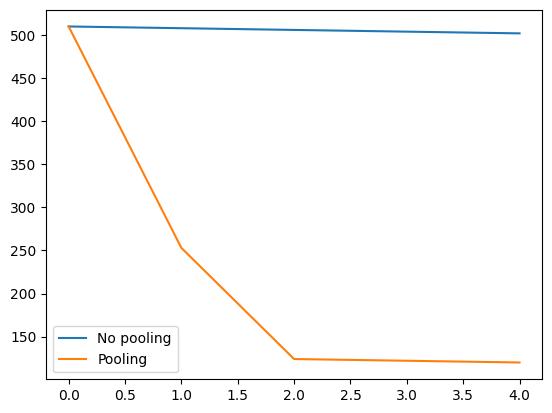

In [13]:
# Let's plot the width of each feature map as we get deeper into the network
_ = plt.plot(nopool_res, label='No pooling')
_ = plt.plot(pool_res, label='Pooling')
_ = plt.legend()

### Key Observations

* We save 87.3% of memory having a model which is pooling after the first couple of conv layers.
* The model that contains pooling runs 11.1 times faster in inference than the other one.
* The width dimension decreases exponentially when inserting the poolings, compared to the one without those poolings.

The convolutional operator works by sweeping the kernel filters through the input image. If we pool `x2` in a couple layers, from the 3rd convlayer onwards we have a `x4` smaller spatial resolution. This means it has to run through by far less pixels to process the whole feature map in those layers. Also, each feature occupies much less memory for the reduced resolution. Pooling is hence a practical downsampling to make our nets fit in memory, and also to get the salient features from the previous incoming feature maps (it gets the maximum activation and forwards only that one within a window). In general, for classification, it is usual to have pooling to condense spatial dimensions into less-and-more-abstract ones. This is done by finish processing the last reduced spatial feature map with some fully connected layer that mixes it all up.

**Questions**
9. *We said that images have 3 dimensions but we are working with elements of 4 dimensions where the last three are: image height, image width and number of channels. Can you guess what is the first dimension?*

10. *How many weight parameters and bias parameters we have at the first convolutional layer?*

11. *Why convolutional layers have less parameters than dense layers?*

12. *Why dimensions are flattened in the flatten layer?*

13. *What is the effect of dividing all the images by 255?*

14. *Can we interpret the output of the softmax function as the probability of a certain set of features to belong to a certain class? Why?*

15. *Given the following features, provide the output of the softmax function (use the below code box):*
\begin{array}{ccc}
5&4&2 \\
4&2&8 \\
4&4&1 \\
\end{array}

16. *Can we use softmax for binary classification? When the number of classes is 2, which function we obtain?*

In [17]:
# TODO 15:
t = torch.Tensor([[5,4,2],[4,2,8],[4,4,1]])
torch.softmax(t, dim=0)

tensor([[5.7612e-01, 4.6831e-01, 2.4704e-03],
        [2.1194e-01, 6.3379e-02, 9.9662e-01],
        [2.1194e-01, 4.6831e-01, 9.0880e-04]])

## Grand Finale: Building a (pseudo) LeNet model

Here we will gather the puzzle pieces we have so far (tensor manipulations, convs, poolings, fully connected layers, etc.) and we will define a pseudo-LeNet model ([LeNet ref](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)). We say "pseudo" because we will obviate the type of actual pooling that the authors proposed by then, or the gaussian connections, or the `Tanh` activations. We will instead use `MaxPooling`s, `Fully connected` layers all the way through, and `ReLU` activations.

For reference, the LeNet model is the following:
![](https://miro.medium.com/max/2154/1*1TI1aGBZ4dybR6__DI9dzA.png)

### Exercise 2

Make the `ConvBlock` class to properly do: `Conv2d`, `ReLU`, and `MaxPool2d`. Ensure that for an input of size `1x32x32` you obtain an output feature map of size `6x14x14` as shown in the figure above for layer `S2`.

In [18]:
class ConvBlock(nn.Module):

  def __init__(self, num_inp_channels, num_out_fmaps,
               kernel_size, pool_size=2):
    super().__init__()
    # TODO: define the 3 modules needed
    self.conv=nn.Conv2d(num_inp_channels,num_out_fmaps,kernel_size)
    self.relu=nn.ReLU()
    self.maxpool=nn.MaxPool2d(pool_size)

  def forward(self, x):
    return self.maxpool(self.relu(self.conv(x)))

x = torch.randn(1, 1, 32, 32)
y = ConvBlock(1, 6, 5, 2)(x)
assert y.shape[1] == 6, 'The amount of feature maps is not correct!'
assert y.shape[2] == 14 and y.shape[3] == 14, 'The spatial dimensions are not correct!'
print('Input shape: {}'.format(x.shape))
print('ConvBlock output shape (S2 level in Figure): {}'.format(y.shape))

Input shape: torch.Size([1, 1, 32, 32])
ConvBlock output shape (S2 level in Figure): torch.Size([1, 6, 14, 14])


### Exercise 3

Finish the `PseudoLeNet` class by including the following:
1. As the input images from MNIST are 28x28, add padding to make them 32x32 with the `torch.nn.ConstantPad2d` (https://pytorch.org/docs/stable/nn.html#torch.nn.ConstantPad2d).
2. Build the `mlp` classifier (remember previous lab session) as a `nn.Sequential` stack of fully connected layers and ReLU activations, with the sizes shown in the figure above: [120, 84, 10]. Plug the appropriate output activation in the end to do multi-class classification.
3. Remember to "flatten" the feature maps coming out of the second `ConvBlock` and connect them to the output `mlp` to build the classifier in the `forward` function. This has to be done because fully connected layers (`Linear`) only accept features without any spatial dimension. Hence, all these spatial dimensions and channels are unrolled into single vectors, one per batch sample. **HINT: Remember the `.view()` operator to change tensors shape!**

In [24]:
class PseudoLeNet(nn.Module):

  def __init__(self):
    super().__init__()
    # TODO: Define the padding
    self.pad=nn.ConstantPad2d(2,1)
    self.conv1 = ConvBlock(1, 6, 5)
    self.conv2 = ConvBlock(6, 16, 5)
    # TODO: Define the MLP at the deepest layers
    self.mlp = nn.Sequential(
        nn.Linear(400,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10),
        nn.Softmax()
    )

  def forward(self, x):
    x = self.pad(x)
    x = self.conv1(x)
    x = self.conv2(x)
    # Obtain the parameters of the tensor in terms of:
    # 1) batch size
    # 2) number of channels
    # 3) spatial "height"
    # 4) spatial "width"
    bsz, nch, height, width = x.shape
    # TODO: Flatten the feature map with the view() operator
    # within each batch sample
    x=x.view(-1, 16 * 5 * 5)
    y = self.mlp(x)
    return y

# Let's forward a toy example emulating the MNIST image size
plenet = PseudoLeNet()
y = plenet(torch.randn(1, 1, 28, 28))
print(y.shape)

torch.Size([1, 10])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


### Now it's time to train and test the model.

We take the previous training and test codes from MLP lab models and run them straightaway. Execute the cells below without more hessitation.

In [25]:
def correct_predictions(predicted_batch, label_batch):
  pred = predicted_batch.argmax(dim=1, keepdim=True) # get the index of the max log-probability
  acum = pred.eq(label_batch.view_as(pred)).sum().item()
  return acum

def train_epoch(train_loader, network, optimizer, criterion, hparams):
  # Activate the train=True flag inside the model
  network.train()
  device = hparams['device']
  avg_loss = None
  avg_weight = 0.1
  for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      output = network(data)
      loss = criterion(output, target)
      loss.backward()
      if avg_loss:
        avg_loss = avg_weight * loss.item() + (1 - avg_weight) * avg_loss
      else:
        avg_loss = loss.item()
      optimizer.step()
      if batch_idx % hparams['log_interval'] == 0:
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              epoch, batch_idx * len(data), len(train_loader.dataset),
              100. * batch_idx / len(train_loader), loss.item()))
  return avg_loss

def test_epoch(test_loader, network, hparams):
    network.eval()
    device = hparams['device']
    test_loss = 0
    acc = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = network(data)
            test_loss += criterion(output, target, reduction='sum').item() # sum up batch loss
            # compute number of correct predictions in the batch
            acc += correct_predictions(output, target)
    # Average acc across all correct predictions batches now
    test_loss /= len(test_loader.dataset)
    test_acc = 100. * acc / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, acc, len(test_loader.dataset), test_acc,
        ))
    return test_loss, test_acc

In [26]:
tr_losses = []
te_losses = []
te_accs = []
network = PseudoLeNet()
network.to(hparams['device'])
optimizer = optim.RMSprop(network.parameters(), lr=hparams['learning_rate'])
criterion = F.nll_loss

for epoch in range(1, hparams['num_epochs'] + 1):
  tr_losses.append(train_epoch(train_loader, network, optimizer, criterion, hparams))
  te_loss, te_acc = test_epoch(test_loader, network, hparams)
  te_losses.append(te_loss)
  te_accs.append(te_acc)


Train Epoch: 1 [0/60000 (0%)]	Loss: -0.100269
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.935461
Train Epoch: 1 [12800/60000 (21%)]	Loss: -0.908836
Train Epoch: 1 [19200/60000 (32%)]	Loss: -0.941241
Train Epoch: 1 [25600/60000 (43%)]	Loss: -0.967176
Train Epoch: 1 [32000/60000 (53%)]	Loss: -0.895823
Train Epoch: 1 [38400/60000 (64%)]	Loss: -0.925419
Train Epoch: 1 [44800/60000 (75%)]	Loss: -0.964965
Train Epoch: 1 [51200/60000 (85%)]	Loss: -0.917072
Train Epoch: 1 [57600/60000 (96%)]	Loss: -0.978423

Test set: Average loss: -0.9575, Accuracy: 9599/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: -0.911638
Train Epoch: 2 [6400/60000 (11%)]	Loss: -0.928350
Train Epoch: 2 [12800/60000 (21%)]	Loss: -0.963087
Train Epoch: 2 [19200/60000 (32%)]	Loss: -0.969809
Train Epoch: 2 [25600/60000 (43%)]	Loss: -0.957482
Train Epoch: 2 [32000/60000 (53%)]	Loss: -0.951770
Train Epoch: 2 [38400/60000 (64%)]	Loss: -0.984318
Train Epoch: 2 [44800/60000 (75%)]	Loss: -0.995948
Train Epoch: 2 [51200/60000 (85%

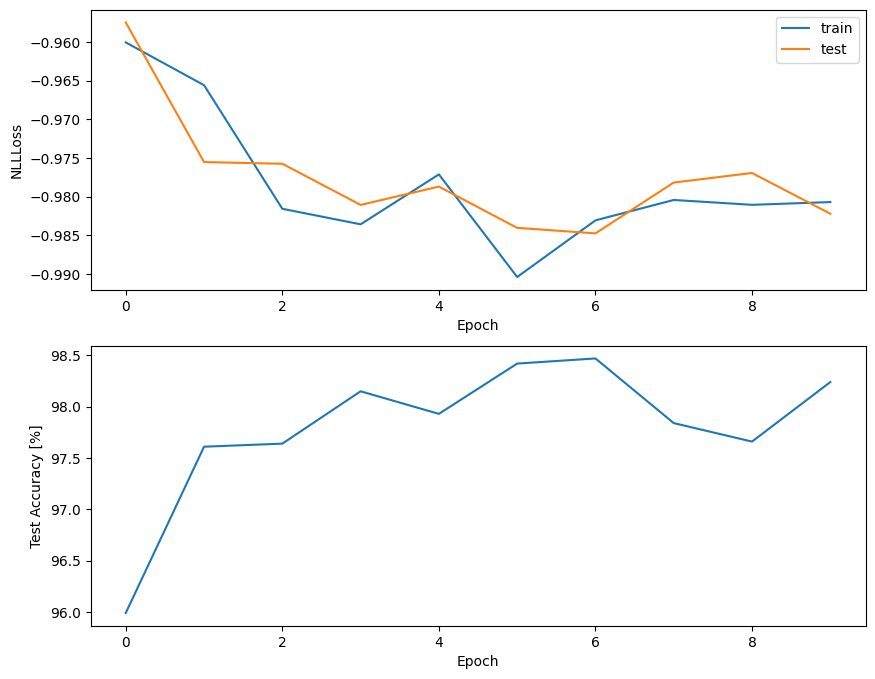

In [27]:
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.xlabel('Epoch')
plt.ylabel('NLLLoss')
plt.plot(tr_losses, label='train')
plt.plot(te_losses, label='test')
plt.legend()
plt.subplot(2,1,2)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy [%]')
plt.plot(te_accs)

### The final result should be slightly above 99%, better than the MLP model for a comparable amount of training.